In [55]:
'''Changing the directory to the directory with the dataset'''
%cd C:\Users\aksho\OneDrive\Desktop\ML_Assessment_2

C:\Users\aksho\OneDrive\Desktop\ML_Assessment_2


In [ ]:
import pandas as pd
print (pd.__version__)

1.5.3


In [57]:
#1. Load the dataset
dataset = pd.read_csv("dataset.csv")
print(dataset)

     f1   f2  f3  f4   f5    f6     f7  target
0     6  148  72  35    0  33.6  0.627       1
1     1   85  66  29    0  26.6  0.351       0
2     8  183  64   0    0  23.3  0.672       1
3     1   89  66  23   94  28.1  0.167       0
4     0  137  40  35  168  43.1  2.288       1
..   ..  ...  ..  ..  ...   ...    ...     ...
761   9   89  62   0    0  22.5      e       0
762  10  101  76  48  180     d  0.171       0
763   2  122  70  27    b  36.8   0.34       0
764   c  121  72  23  112  26.2  0.245       0
765   1  126  60   a    0  30.1  0.349       1

[766 rows x 8 columns]


In [58]:
# 2. Analyze the dataset
dataset.describe()
#We aren't getting the full result because there are some invalid values in other columns.

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [59]:
#Before visualizing the data, we must ensure that it is clean
print(dataset.isnull().sum())

#No null dataset

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64


In [60]:
#From the describe method, we can see that all columns except target and f3 require some cleaning to do

dirty_columns = ['f1', 'f2', 'f4','f5','f6','f7']

for col in dirty_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    mean_value = dataset[col].mean()
    dataset[col].fillna(mean_value, inplace=True)

print(dataset.describe())

values = dataset['target'].unique()
print(values)

#With this all of our columns are converted into numeric types and the invalid values replaced
#By printing values, we also know that the target has 2 values, making it binary classification
    

               f1          f2          f3          f4          f5          f6  \
count  766.000000  766.000000  766.000000  766.000000  766.000000  766.000000   
mean     3.849673  120.909804   69.118799   20.542484   80.091503   31.998170   
std      3.371490   31.927057   19.376901   15.950080  115.298950    7.893111   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.500000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.750000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

               f7      target  
count  766.000000  766.000000  
mean     0.472128    0.349869  
std      0.331328    0.477240  
min      0.078000    0.000000  
25%      0.244000    0.000000  
50%      0.374500    0.000000  
75%      0.625500    1.000000  
max      2.420

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

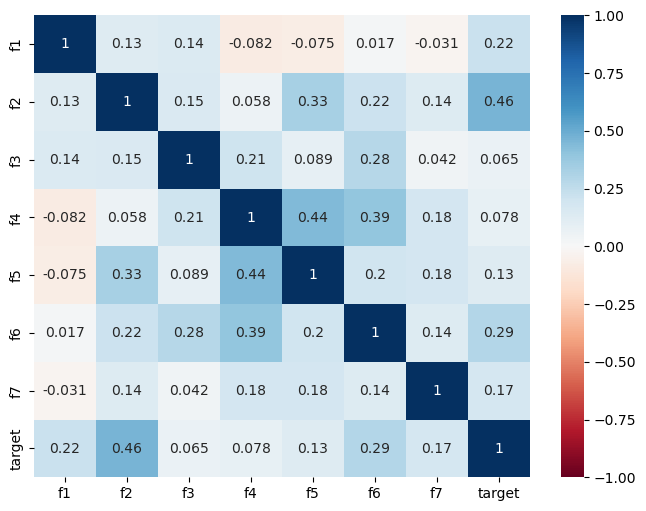

In [236]:
#Visualization graphs

#1. Correlation matrix - This helps us to see the correlation of input features with target and will help us in identifying
# which columns we need for target

dataset_correlation = dataset.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(dataset_correlation , annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

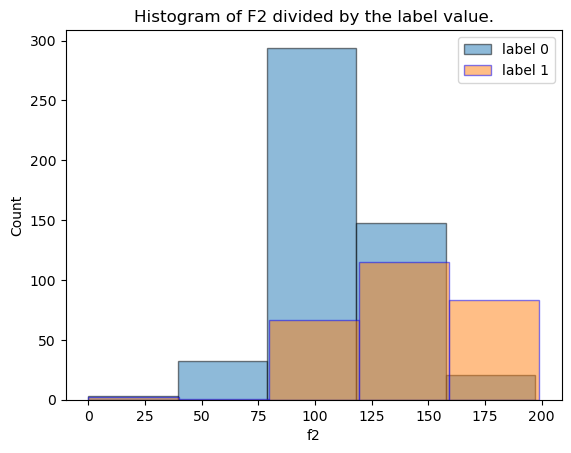

In [63]:
#2 Histogram
# This histogram shows us the division of the samples based on labels in varying values of f2

plt.hist(dataset[dataset['target']==0]['f2'], alpha=0.5, label='label 0', bins=5, edgecolor='black')

plt.hist(dataset[dataset['target']==1]['f2'], alpha=0.5, label='label 1', bins=5, edgecolor='blue')

plt.title("Histogram of F2 divided by the label value.")
plt.xlabel('f2')
plt.ylabel('Count')
plt.legend(loc='upper right')

plt.show()

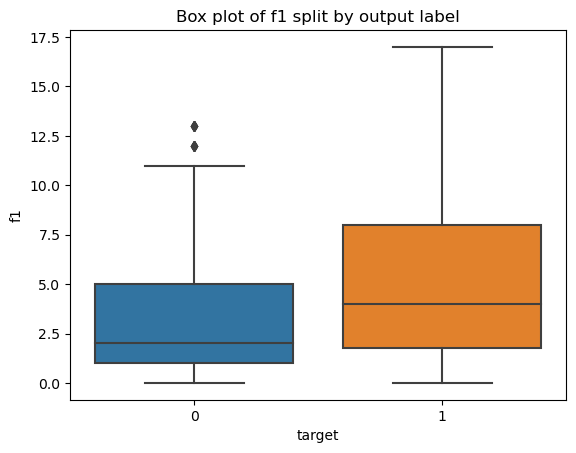

In [64]:
#The following is the box plot of f1 split by the output label, it helps us understand the central tendency and the spread of
#the data with respect to different target label.
sns.boxplot(x='target', y='f1', data=dataset)
plt.title('Box plot of f1 split by output label')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
#Preprocess the data
#Since all of our columns are numeric data, we don't have to make use of one-hot encoding, however, we will normalize our data

#We divide the data and normalize the columns
normalizer = StandardScaler()

#We are dropping f3 and f4 as they have low correlation
features = dataset.drop(columns=['target','f3','f4'], axis=1)
label = dataset['target']

normalized_features = normalizer.fit_transform(features)

features = pd.DataFrame(normalized_features, columns=features.columns)

print(features)
print(label)



               f1        f2        f5            f6            f7
0    6.382139e-01  0.849057 -0.695096  2.030729e-01  4.677335e-01
1   -8.457789e-01 -1.125480 -0.695096 -6.843559e-01 -3.658228e-01
2    1.231811e+00  1.946022 -0.695096 -1.102715e+00  6.036394e-01
3   -8.457789e-01 -1.000113  0.120709 -4.941926e-01 -9.215270e-01
4   -1.142577e+00  0.504297  0.762938  1.407440e+00  5.484172e+00
..            ...       ...       ...           ...           ...
761  1.528610e+00 -1.000113 -0.695096 -1.204136e+00  1.676510e-16
762  1.825408e+00 -0.624010  0.867083  4.503972e-16 -9.094465e-01
763 -5.489804e-01  0.034169  0.000000  6.087546e-01 -3.990443e-01
764  1.318050e-16  0.002827  0.276927 -7.350661e-01 -6.859567e-01
765 -8.457789e-01  0.159536 -0.695096 -2.406415e-01 -3.718631e-01

[766 rows x 5 columns]
0      1
1      0
2      1
3      0
4      1
      ..
761    0
762    0
763    0
764    0
765    1
Name: target, Length: 766, dtype: int64


In [76]:
#Splitting dataset into training, validation and testing
#From the total data, the split is (0.7, 0.15, 0.15) for training, testing and validation respectively
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

X_Combined, X_Test, Y_Combined, Y_Test = train_test_split (features, label, test_size = 0.15)
X_Train, X_Valid, Y_Train, Y_Valid = train_test_split (X_Combined, Y_Combined, test_size = 0.176)

#Here we are converting the dataframe into dataloader structures which make it convenient to iterate over in mini-batches during
#training or the evaluation of our model.

X_Train_tensor = torch.tensor(X_Train.values, dtype=torch.float32)
Y_Train_tensor = torch.tensor(Y_Train.values, dtype=torch.float32)
X_Valid_tensor = torch.tensor(X_Valid.values, dtype=torch.float32)
Y_Valid_tensor = torch.tensor(Y_Valid.values, dtype=torch.float32)
X_Test_tensor = torch.tensor(X_Test.values, dtype=torch.float32)
Y_Test_tensor = torch.tensor(Y_Test.values, dtype=torch.float32)

train_dataloader = DataLoader(TensorDataset(X_Train_tensor, Y_Train_tensor), batch_size=32, shuffle=True)
valid_dataloader = DataLoader(TensorDataset(X_Valid_tensor, Y_Valid_tensor), batch_size=32, shuffle=False)
test_dataloader = DataLoader(TensorDataset(X_Test_tensor, Y_Test_tensor), batch_size=32, shuffle=False)



In [ ]:
#Step 3: Defining the Neural Network

# 1. Decide your NN architecture.

# How many input neurons are there? 
# We will use 5 input neurons as we have dropped 2 columns which have low correlation.

# How many output neurons are there? 
# Since it is a binary classification, we have one output neuron.

# What activation function is used for the hidden layers? 
# We will use Rectified Linear Unit or ReLU as activation function for the nodes of our hidden layer.

# What is the activation function used for the output layer?
# For the output layer we use the sigmoid activation function as it is a binary classification problem.

# What is the number of hidden layers? While starting, we will use 3 hidden layers for our neural network.

# What is the size of each hidden layer?
# 1st Layer: 64
# 2nd layer: 128
# 3rd Layer: 64

# Do you include dropout? Yes we include dropout in our model so that we can have more regularized model less prone to overfitting.


In [77]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [156]:
# 2. Define your NN architecture using PyTorch

class CustomNeuralNet(nn.Module):
    def __init__(self):
        super(CustomNeuralNet, self).__init__()
        self.fc1 = nn.Linear(5, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x.squeeze()

In [21]:
#Installing torchinfo
# !pip install torchinfo

  Obtaining dependency information for torchinfo from https://files.pythonhosted.org/packages/72/25/973bd6128381951b23cdcd8a9870c6dcfc5606cb864df8eabd82e529f9c1/torchinfo-1.8.0-py3-none-any.whl.metadata


In [157]:
# 3. Return the summary of your model using torchinfo.

from torchinfo import summary

model = CustomNeuralNet()

summary(model, input_size=(1,5))

Layer (type:depth-idx)                   Output Shape              Param #
CustomNeuralNet                          --                        --
├─Linear: 1-1                            [1, 64]                   384
├─Dropout: 1-2                           [1, 64]                   --
├─Linear: 1-3                            [1, 128]                  8,320
├─Dropout: 1-4                           [1, 128]                  --
├─Linear: 1-5                            [1, 64]                   8,256
├─Linear: 1-6                            [1, 1]                    65
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07

In [204]:
import time
from sklearn.metrics import accuracy_score

In [229]:
#Step 4: Training the Neural Network
# 1. Setting up the training loop

# 2. Loss function: Binary Cross Entropy Loss
criterion = nn.BCELoss()

# 3. Optimizer used: Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


def train_model(model, optimizer, train_dataloader, valid_dataloader, criterion, num_epochs=2):
    training_loss_list =[]
    validation_loss_list = []
    training_accuracy_list = []
    validation_accuracy_list = []
    
    for epoch in range(num_epochs):
        #This part is for training the model, where we will propagate forward, calculate the error and propagate backward using
        #an optimizer to find the optimal weights for our model and update them.
        running_training_loss = 0.0
        all_predicted_labels = []
        all_true_labels = []
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            all_predicted_labels.extend(outputs.detach().numpy()>0.5)
            all_true_labels.extend(labels.numpy())
            
            running_training_loss += loss.item() * inputs.size(0)
        
        training_accuracy = accuracy_score(all_true_labels, all_predicted_labels)
        training_accuracy_list.append(training_accuracy)
        
        epoch_training_loss = running_training_loss / len(train_dataloader.dataset)
        training_loss_list.append(epoch_training_loss)

        #This part is for validating the model after the training.
        model.eval()
        running_validation_loss = 0.0
        
        all_predicted_labels = []
        all_true_labels = []
        with torch.no_grad():
            for inputs, labels in valid_dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                all_predicted_labels.extend(outputs.detach().numpy()>0.5)
                all_true_labels.extend(labels.numpy())
                
                running_validation_loss += loss.item() * inputs.size(0)
                
        validation_accuracy = accuracy_score(all_true_labels, all_predicted_labels)
        validation_accuracy_list.append(validation_accuracy)

        epoch_validation_loss = running_validation_loss/ len(valid_dataloader.dataset)
        validation_loss_list.append(epoch_validation_loss)

        if((epoch+1) % 20 == 0):
            print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {epoch_training_loss}, Validation Loss: {epoch_validation_loss}")
    return model, training_loss_list, validation_loss_list, training_accuracy_list, validation_accuracy_list


In [230]:
# 4. Train the neural network. Monitor training loss and the validation loss
model1 = CustomNeuralNet()
criterion1 = nn.BCELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)
training_start = time.time()
model, training_loss_list, validation_loss_list, training_accuracy_list, validation_accuracy_list = train_model(model1, optimizer1, train_dataloader, valid_dataloader, criterion1, num_epochs=200)
training_end = time.time()
training_time = training_end - training_start


Epoch 20/200 - Train Loss: 0.5845537612687296, Validation Loss: 0.6509451218273329
Epoch 40/200 - Train Loss: 0.4914662170766005, Validation Loss: 0.5797837936359903
Epoch 60/200 - Train Loss: 0.4639886697726463, Validation Loss: 0.5524354582247527
Epoch 80/200 - Train Loss: 0.4547524229804082, Validation Loss: 0.5421502890794173
Epoch 100/200 - Train Loss: 0.4491503523356879, Validation Loss: 0.5361685141273167
Epoch 120/200 - Train Loss: 0.4443889015646123, Validation Loss: 0.5321828367917434
Epoch 140/200 - Train Loss: 0.43998359477342064, Validation Loss: 0.528683403523072
Epoch 160/200 - Train Loss: 0.43583007445975913, Validation Loss: 0.5305108047049979
Epoch 180/200 - Train Loss: 0.4319029761784112, Validation Loss: 0.5310971156410549
Epoch 200/200 - Train Loss: 0.42800189043158915, Validation Loss: 0.5310151890568111


In [197]:
#5. Evaluate the performance of the model on the testing data.
from torchmetrics.classification import BinaryAccuracy
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_metrics(model, dataloader):
    model.eval()
    accuracy = BinaryAccuracy(threshold=0.5)
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_values = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            
            predicted = (outputs>0.5).float()
            
            all_predicted_values.extend(outputs.numpy())
            all_predicted_labels.extend(predicted.numpy())
            all_true_labels.extend(labels.numpy())
    precision = precision_score(all_true_labels,all_predicted_labels)
    recall = recall_score(all_true_labels,all_predicted_labels)
    f1 = f1_score(all_true_labels, all_predicted_labels)
    accuracy = sum([true == pred for true, pred in zip (all_predicted_labels, all_true_labels)])/ len(all_true_labels)
    
    return accuracy, precision, recall, f1, all_predicted_labels, all_true_labels, all_predicted_values

accuracy, precision, recall, f1, predicted_label, true_label, predicted_value = evaluate_metrics(model1, train_dataloader)

print("Testing Accuracy",accuracy)
print("Precision Score", precision)
print("Recall Score", recall)
print("f1 score", f1)
print("Training Time", training_time)

Testing Accuracy 0.789179104477612
Precision Score 0.7133333333333334
Recall Score 0.6045197740112994
f1 score 0.6544342507645261
Training Time 4.424584150314331


In [448]:
#6. Save the weights of the trained neural network
torch.save(model1.state_dict(),"Initial_Setup")


In [216]:
#7. Visualize the results

#We will define the functions for drawing the graphs as we will need them again for part 2.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Function for drawing confusion matrix
def draw_confusion_matrix(true_label, predicted_label):
    confusion = confusion_matrix(true_label, predicted_label)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#Function for drawing ROC Curve
def draw_roc_curve(true_label, predicted_value):
    fpr, tpr, thresholds = roc_curve(true_label, predicted_value)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label ='ROC curve')
    plt.plot([0,1],[0,1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def draw_accuracy_graph(training_accuracy, validation_accuracy):
    epochs = range(1, len(training_accuracy) + 1)
    plt.plot(epochs, training_accuracy, 'g', label='Training accuracy')
    plt.plot(epochs, validation_accuracy, 'y', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def draw_losses_graph(training_losses, validation_losses):
    epochs = range(1, len(training_losses) + 1)
    plt.plot(epochs, training_losses, 'g', label='Training loss')
    plt.plot(epochs, validation_losses, 'y', label='Validation loss')
    plt.title('Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

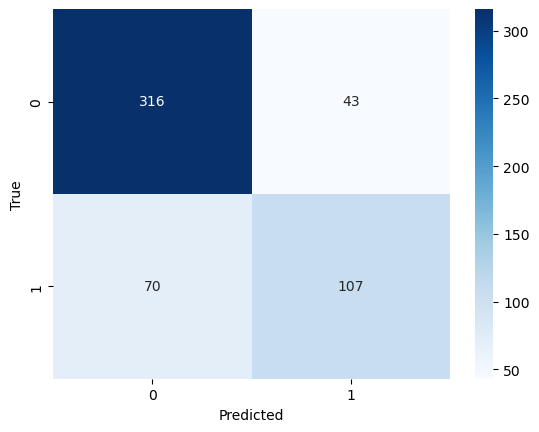

In [200]:
#a. Confusion matrix    
draw_confusion_matrix(true_label, predicted_label)

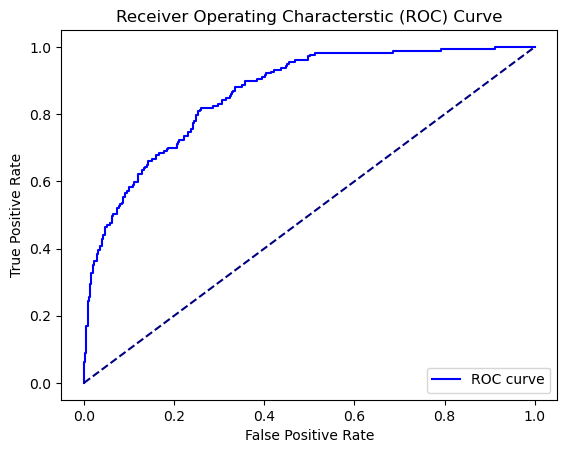

In [203]:
#b. ROC curve
draw_roc_curve(true_label,predicted_value)

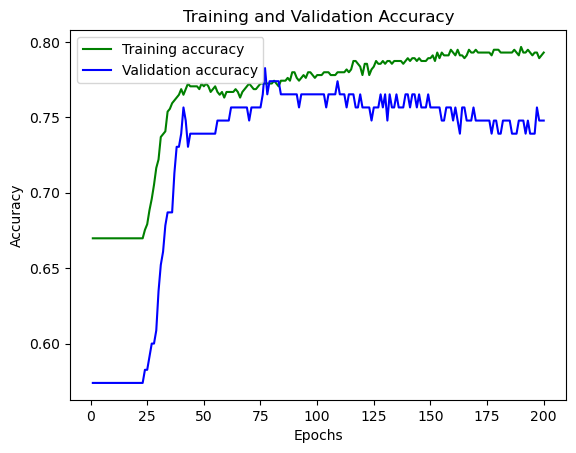

In [231]:
#c. A graph that compares test, validation and training accuracy on the same plot
draw_accuracy_graph(training_accuracy_list, validation_accuracy_list)

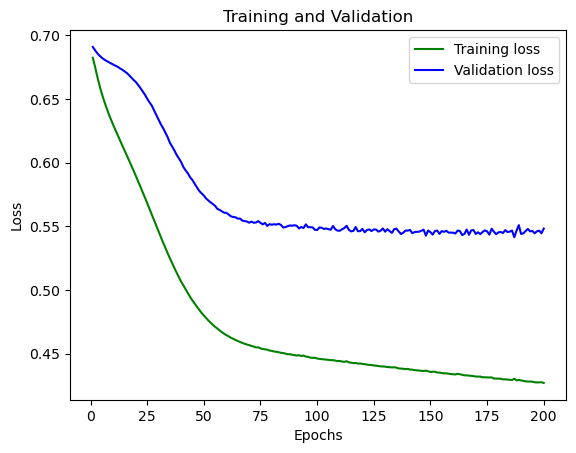

In [218]:
#d. A graph that compares test, validation and training loss on the same plot
draw_losses_graph(training_loss_list, validation_loss_list)

In [ ]:
# Part 2: Optimizing NN

In [238]:
# Setup 1: Same setup dropout rate 0.5

class Setup2NeuralNet(nn.Module):
    def __init__(self):
        super(Setup2NeuralNet, self).__init__()
        self.fc1 = nn.Linear(5, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x.squeeze()

In [240]:
# Set the model
# Train the neural network. Monitor training loss and the validation loss
model2 = Setup2NeuralNet()
optimizer2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
model2, training_loss_list2, validation_loss_list2, training_accuracy_list2, validation_accuracy_list2 = train_model(model2, optimizer2, train_dataloader, valid_dataloader, criterion1, num_epochs=200)


Epoch 20/200 - Train Loss: 0.6055510204229781, Validation Loss: 0.6709054827690124
Epoch 40/200 - Train Loss: 0.5327691756077667, Validation Loss: 0.6266221652860227
Epoch 60/200 - Train Loss: 0.4786243336414223, Validation Loss: 0.5808295845985413
Epoch 80/200 - Train Loss: 0.4604216653909256, Validation Loss: 0.563674477390621
Epoch 100/200 - Train Loss: 0.45215223929775294, Validation Loss: 0.5542527354281882
Epoch 120/200 - Train Loss: 0.4456858185689841, Validation Loss: 0.5509420094282731
Epoch 140/200 - Train Loss: 0.4408932016856635, Validation Loss: 0.5500073033830394
Epoch 160/200 - Train Loss: 0.43570255343593767, Validation Loss: 0.5473491482112719
Epoch 180/200 - Train Loss: 0.4311740380614551, Validation Loss: 0.548022402887759
Epoch 200/200 - Train Loss: 0.4269167896526963, Validation Loss: 0.5486699270165485


In [250]:
# Test the neural net and get various evaluation metrics
accuracy2, precision2, recall2, f12, predicted_label2, true_label2, predicted_value2 = evaluate_metrics(model1, train_dataloader)


In [449]:
# Save the model
torch.save(model2.state_dict(),"Setup2")


In [253]:
# Accuracy of the model
print("Testing Accuracy",accuracy2)

Testing Accuracy 0.7910447761194029


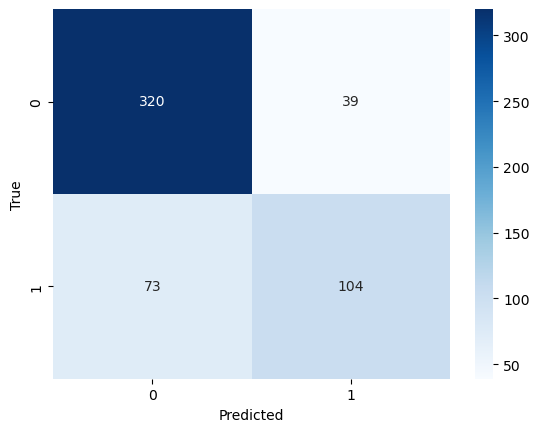

In [246]:
# Visualize the result

#a. Confusion matrix    
draw_confusion_matrix(true_label2, predicted_label2)

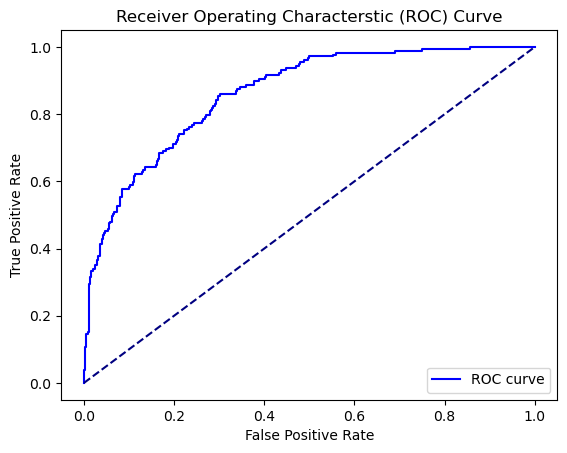

In [247]:
#b. ROC curve
draw_roc_curve(true_label2,predicted_value2)

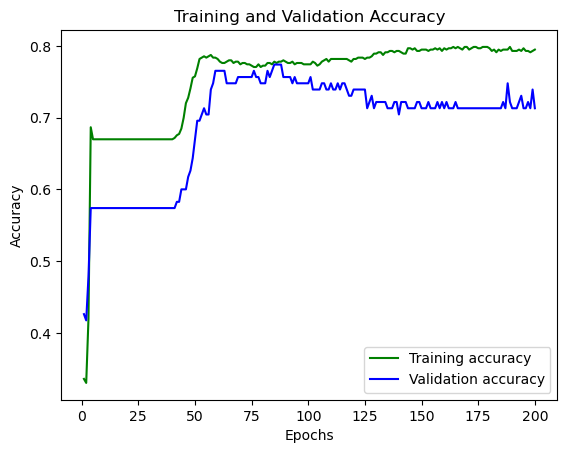

In [248]:
#c. A graph that compares test, validation and training accuracy on the same plot
draw_accuracy_graph(training_accuracy_list2, validation_accuracy_list2)

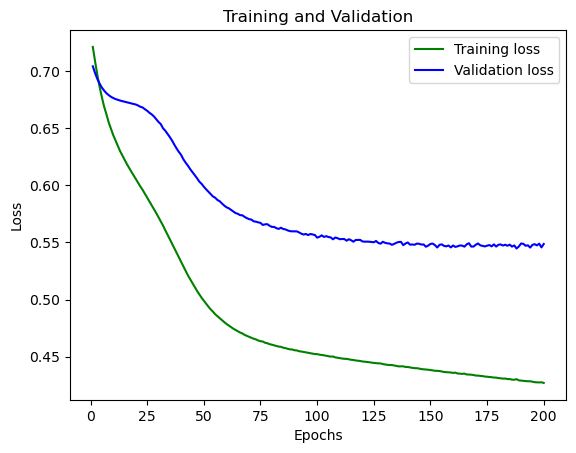

In [249]:
#d. A graph that compares test, validation and training loss on the same plot
draw_losses_graph(training_loss_list2, validation_loss_list2)

In [254]:
# Setup 3: Same setup different activation function (Parametric Relu)

import torch.nn as nn

class Setup3NeuralNet(nn.Module):
    def __init__(self):
        super(Setup3NeuralNet, self).__init__()
        self.fc1 = nn.Linear(5, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.selu(self.fc1(x))
        x = self.dropout1(x)
        x = F.selu(self.fc2(x))
        x = self.dropout2(x)
        x = F.selu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x.squeeze()

In [256]:
# Set the model
# Train the neural network. Monitor training loss and the validation loss
model3 = Setup3NeuralNet()
optimizer3 = optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)
model3, training_loss_list3, validation_loss_list3, training_accuracy_list3, validation_accuracy_list3 = train_model(model3, optimizer3, train_dataloader, valid_dataloader, criterion1, num_epochs=200)

Epoch 20/200 - Train Loss: 0.4562411441731809, Validation Loss: 0.5321797329446544
Epoch 40/200 - Train Loss: 0.4527789127470842, Validation Loss: 0.5323271461155104
Epoch 60/200 - Train Loss: 0.4496545871691917, Validation Loss: 0.5311475650123928
Epoch 80/200 - Train Loss: 0.44620801041375346, Validation Loss: 0.5326092520485753
Epoch 100/200 - Train Loss: 0.44305807707914663, Validation Loss: 0.5343881591506626
Epoch 120/200 - Train Loss: 0.4396764871789448, Validation Loss: 0.5327595410139664
Epoch 140/200 - Train Loss: 0.4362480609274622, Validation Loss: 0.5324911490730617
Epoch 160/200 - Train Loss: 0.433035677938319, Validation Loss: 0.5339829481166342
Epoch 180/200 - Train Loss: 0.4288495298641831, Validation Loss: 0.5396355421646781
Epoch 200/200 - Train Loss: 0.42383211806638915, Validation Loss: 0.5377845137015633


In [259]:
# Test the neural net and get various evaluation metrics
accuracy3, precision3, recall3, f13, predicted_label3, true_label3, predicted_value3 = evaluate_metrics(model3, train_dataloader)

In [450]:
# Save the model
torch.save(model3.state_dict(),"Setup3")

In [261]:
# Accuracy of the model
print("Testing Accuracy",accuracy3)

Testing Accuracy 0.7947761194029851


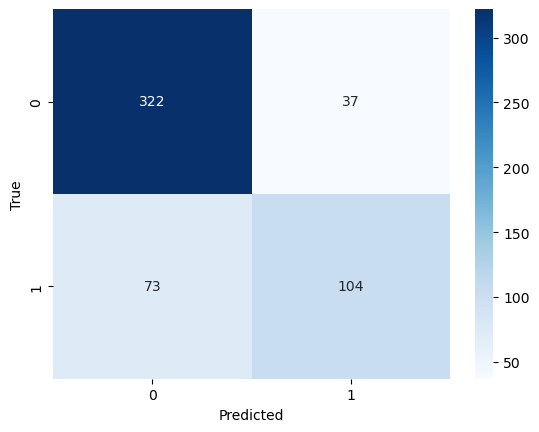

In [262]:
# Visualize the result

#a. Confusion matrix    
draw_confusion_matrix(true_label3, predicted_label3)

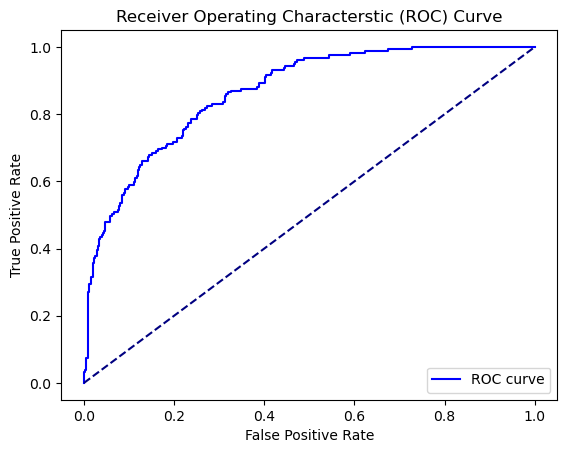

In [263]:
#b. ROC curve
draw_roc_curve(true_label3,predicted_value3)

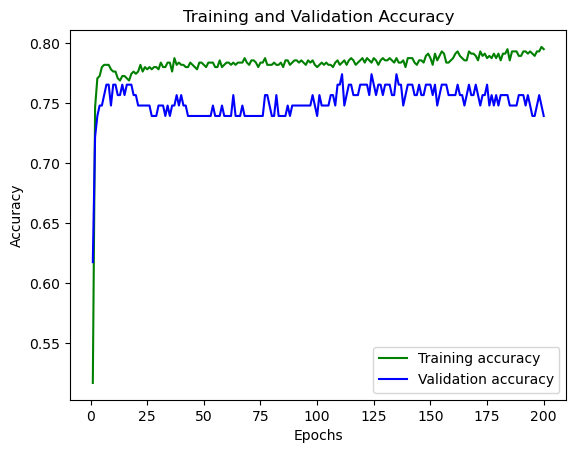

In [264]:
#c. A graph that compares test, validation and training accuracy on the same plot
draw_accuracy_graph(training_accuracy_list3, validation_accuracy_list3)

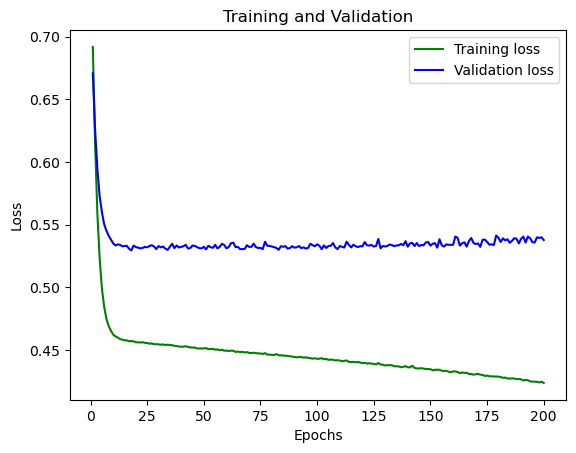

In [265]:
#d. A graph that compares test, validation and training loss on the same plot
draw_losses_graph(training_loss_list3, validation_loss_list3)

In [266]:
# Setup 4: Same setup different initialization function (Xavier_uniform)

import torch.nn as nn
import torch.nn.functional as F
import torch

class Setup4NeuralNet(nn.Module):
    def __init__(self):
        super(Setup4NeuralNet, self).__init__()
        self.fc1 = nn.Linear(5, 64)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 128)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        self.fc4 = nn.Linear(64, 1)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x.squeeze()

In [338]:
# Set the model
# Train the neural network. Monitor training loss and the validation loss
model4 = Setup4NeuralNet()
optimizer4 = optim.SGD(model4.parameters(), lr=0.001, momentum=0.9)
start_time = time.time()
model4, training_loss_list4, validation_loss_list4, training_accuracy_list4, validation_accuracy_list4 = train_model(model4, optimizer4, train_dataloader, valid_dataloader, criterion1, num_epochs=200)
end_time = time.time()
train_time_model4 = end_time-start_time

Epoch 20/200 - Train Loss: 0.4924406529362522, Validation Loss: 0.5512882766516313
Epoch 40/200 - Train Loss: 0.45653111365304067, Validation Loss: 0.5291443747022878
Epoch 60/200 - Train Loss: 0.44637307702605405, Validation Loss: 0.5276739322620889
Epoch 80/200 - Train Loss: 0.44017642069218765, Validation Loss: 0.5247450657512831
Epoch 100/200 - Train Loss: 0.4336259863269863, Validation Loss: 0.529919419599616
Epoch 120/200 - Train Loss: 0.4285357042924682, Validation Loss: 0.53070336787597
Epoch 140/200 - Train Loss: 0.42385057593459513, Validation Loss: 0.5333868368812229
Epoch 160/200 - Train Loss: 0.41931917240370564, Validation Loss: 0.5373052311980206
Epoch 180/200 - Train Loss: 0.41464510515554626, Validation Loss: 0.5401871852252794
Epoch 200/200 - Train Loss: 0.4099943651192224, Validation Loss: 0.5390368990276171


In [339]:
# Test the neural net and get various evaluation metrics
accuracy4, precision4, recall4, f14, predicted_label4, true_label4, predicted_value4 = evaluate_metrics(model4, train_dataloader)

In [451]:
# Save the model
torch.save(model4.state_dict(),"Setup4")

In [342]:
# Accuracy of the model
print("Testing Accuracy",accuracy4)
print("Training Time",train_time_model4)

Testing Accuracy 0.8003731343283582
Training Time 5.114831924438477


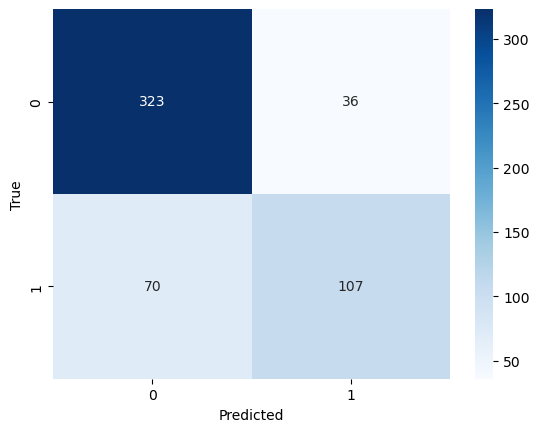

In [281]:
# Visualize the result

#a. Confusion matrix    
draw_confusion_matrix(true_label4, predicted_label4)

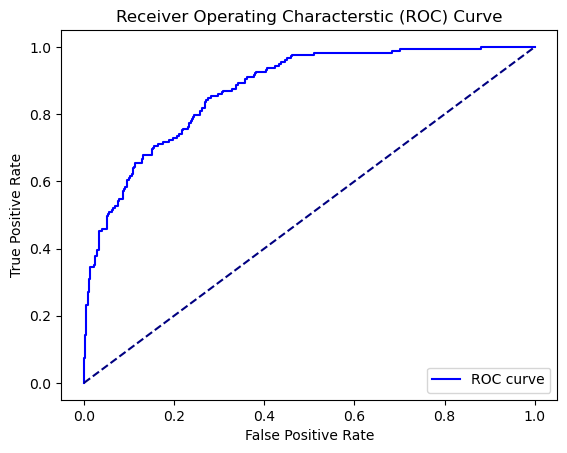

In [282]:
#b. ROC curve
draw_roc_curve(true_label4,predicted_value4)

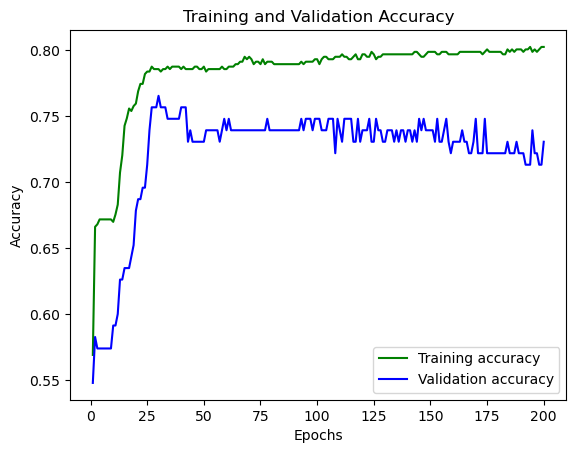

In [283]:
#c. A graph that compares test, validation and training accuracy on the same plot
draw_accuracy_graph(training_accuracy_list4, validation_accuracy_list4)

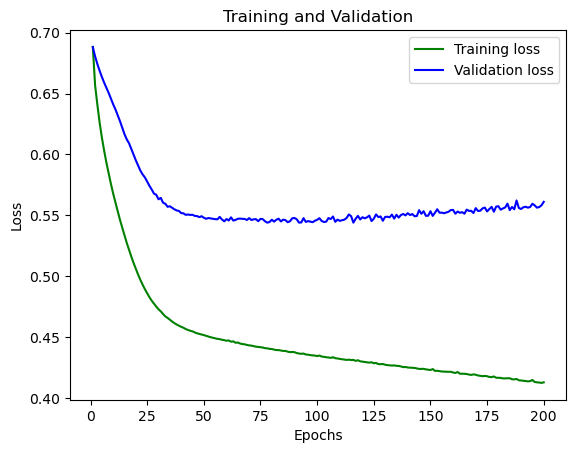

In [284]:
#d. A graph that compares test, validation and training loss on the same plot
draw_losses_graph(training_loss_list4, validation_loss_list4)

In [ ]:
#From all of the models that we have observed, we can see that the one utilizing Xavier_uniform is performing the best with
#80.03% testing accuracy. Therefore, we will use it as a base model for qn 4.

In [ ]:
#Try four different methods & tools to increase training speed, accuracy,etc.

In [ ]:
#1. Early stopping
# For early stopping we will make changes to the training method and train the base model using above to find out the best 
# number of iteration and get the model with the best setup. 

In [345]:
# 1. Setting up the training loop

# 2. Loss function: Binary Cross Entropy Loss
criterion = nn.BCELoss()

# 3. Optimizer used: Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


def train_model_es(model, optimizer, train_dataloader, valid_dataloader, criterion, patience, num_epochs=2):
    training_loss_list =[]
    validation_loss_list = []
    training_accuracy_list = []
    validation_accuracy_list = []
    
    best_validation_loss = float('inf')
    patientce_counter = 0
    max_patience = patience
    
    for epoch in range(num_epochs):
        #This part is for training the model, where we will propagate forward, calculate the error and propagate backward using
        #an optimizer to find the optimal weights for our model and update them.
        running_training_loss = 0.0
        all_predicted_labels = []
        all_true_labels = []
        
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            all_predicted_labels.extend(outputs.detach().numpy()>0.5)
            all_true_labels.extend(labels.numpy())
            
            running_training_loss += loss.item() * inputs.size(0)
        
        training_accuracy = accuracy_score(all_true_labels, all_predicted_labels)
        training_accuracy_list.append(training_accuracy)
        
        epoch_training_loss = running_training_loss / len(train_dataloader.dataset)
        training_loss_list.append(epoch_training_loss)

        #This part is for validating the model after the training.
        model.eval()
        running_validation_loss = 0.0
        
        all_predicted_labels = []
        all_true_labels = []
        with torch.no_grad():
            for inputs, labels in valid_dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                all_predicted_labels.extend(outputs.detach().numpy()>0.5)
                all_true_labels.extend(labels.numpy())
                
                running_validation_loss += loss.item() * inputs.size(0)
                
        validation_accuracy = accuracy_score(all_true_labels, all_predicted_labels)
        validation_accuracy_list.append(validation_accuracy)

        epoch_validation_loss = running_validation_loss/ len(valid_dataloader.dataset)
        validation_loss_list.append(epoch_validation_loss)
        
        #Code for early stopping
        if(epoch_validation_loss < best_validation_loss):
            best_validation_loss = epoch_validation_loss
            patience_counter = 0
        else:
            patience_counter += 1
            
        if(patience_counter > max_patience):
            print(f"Early stopping at {epoch+1}")
            break

        if((epoch+1) % 20 == 0):
            print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {epoch_training_loss}, Validation Loss: {epoch_validation_loss}")
    return model, training_loss_list, validation_loss_list, training_accuracy_list, validation_accuracy_list


In [346]:
# Set the model
# Train the neural network. Monitor training loss and the validation loss
model_es = Setup4NeuralNet()
optimizer_es = optim.SGD(model_es.parameters(), lr=0.001, momentum=0.9)
start_time_es = time.time()
model_with_es, training_loss_list_es, validation_loss_list_es, training_accuracy_list_es, validation_accuracy_list_es = train_model_es(model_es, optimizer_es, train_dataloader, valid_dataloader, criterion1, 10, num_epochs=400)
end_time_es = time.time()
train_time_es = end_time_es - start_time_es

Epoch 20/400 - Train Loss: 0.4798643108624131, Validation Loss: 0.5562701432601266
Epoch 40/400 - Train Loss: 0.4514360650261836, Validation Loss: 0.5375749178554701
Epoch 60/400 - Train Loss: 0.4432614605818222, Validation Loss: 0.5320112337236819
Early stopping at 71


In [347]:
# Test the neural net and get various evaluation metrics
accuracy_es, _, _, _, _, _, _ = evaluate_metrics(model_es, train_dataloader)
print("The accuracy of the model is: ",accuracy_es)
print("Time to train: ", train_time_es)

The accuracy of the model is:  0.7854477611940298
Time to train:  1.7710955142974854


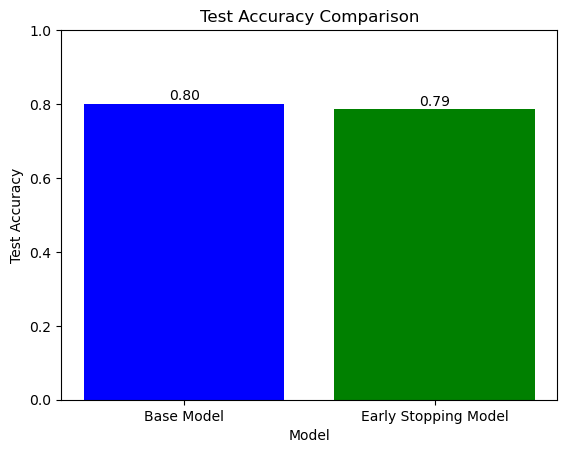

In [352]:
#Comparison based on accuracy

models = ['Base Model', 'Early Stopping Model']
accuracies = [accuracy4, accuracy_es]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0,1)

for i,v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

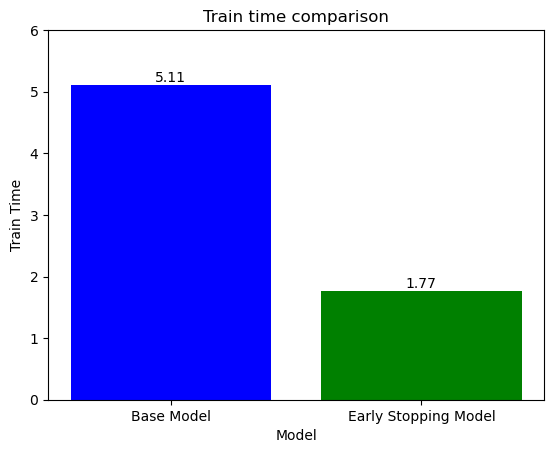

In [362]:
#Comparison based on accuracy

models = ['Base Model', 'Early Stopping Model']
train_time = [train_time_model4, train_time_es]

plt.bar(models,train_time, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Train Time')
plt.title('Train time comparison')
plt.ylim(0,6)

for i,v in enumerate(train_time):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')

plt.show()

In [386]:
#K-fold training using 5 folds
import numpy as np
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset, random_split

#We need this for combining our features and labels dataframe while still being able to access them seperately from our tensors.
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        feature = torch.tensor(self.features.iloc[index].values, dtype=torch.float32)
        label = torch.tensor(self.labels.iloc[index], dtype=torch.float32)
        return feature, label



def k_fold_train(features, labels, num_epochs=200, k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    models = []

    # Loss function: Binary Cross Entropy Loss
    criterion = nn.BCELoss()

    # Initialize lists to save results
    fold_training_loss = []
    fold_validation_loss = []
    fold_training_accuracy = []
    fold_validation_accuracy = []

    for fold, (train_ids, valid_ids) in enumerate(kfold.split(features)):
        # Print
        print(f'fold {fold}')

        # Sample elements randomly from a given list of ids, no replacement.
        train_features = features.iloc[train_ids]
        train_labels = labels.iloc[train_ids]
        valid_features = features.iloc[valid_ids]
        valid_labels = labels.iloc[valid_ids]

        # Define data loaders for training and testing data in this fold
        train_dataset = CustomDataset(train_features, train_labels)
        valid_dataset = CustomDataset(valid_features, valid_labels)

        trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        validloader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

        # Initialize model and optimizer
        model = Setup4NeuralNet()  # Make sure you have this model definition somewhere in your script.
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

        # Train the model
        trained_model, training_loss_list, validation_loss_list, training_accuracy_list, validation_accuracy_list = train_model(
            model, optimizer, trainloader, validloader, criterion, num_epochs=num_epochs
        )

        models.append(trained_model)

        fold_training_loss.append(training_loss_list)
        fold_validation_loss.append(validation_loss_list)
        fold_training_accuracy.append(training_accuracy_list)
        fold_validation_accuracy.append(validation_accuracy_list)

    return models, fold_training_loss, fold_validation_loss, fold_training_accuracy, fold_validation_accuracy


In [396]:
#Training under k_fold
start_time_kfold = time.time()
models, fold_training_loss, fold_validation_loss, fold_training_accuracy, fold_validation_accuracy = k_fold_train(features, label)
end_time_kfold = time.time()
time_taken_kfold = end_time_kfold - start_time_kfold

fold 0
Epoch 20/200 - Train Loss: 0.48301802780113967, Validation Loss: 0.4834521590889274
Epoch 40/200 - Train Loss: 0.4633956571030461, Validation Loss: 0.4834547979491098
Epoch 60/200 - Train Loss: 0.4582936300171746, Validation Loss: 0.4880226118998094
Epoch 80/200 - Train Loss: 0.4549157839584974, Validation Loss: 0.4874295491676826
Epoch 100/200 - Train Loss: 0.4517326880903805, Validation Loss: 0.4859120443269804
Epoch 120/200 - Train Loss: 0.4492401174860063, Validation Loss: 0.4819754830428532
Epoch 140/200 - Train Loss: 0.4457458725162581, Validation Loss: 0.48720463684626986
Epoch 160/200 - Train Loss: 0.4422190843843946, Validation Loss: 0.4883493216006787
Epoch 180/200 - Train Loss: 0.4386376265217276, Validation Loss: 0.48273330617260624
Epoch 200/200 - Train Loss: 0.4348756565767176, Validation Loss: 0.4801350042417452
fold 1
Epoch 20/200 - Train Loss: 0.4913947360550599, Validation Loss: 0.5186859591334474
Epoch 40/200 - Train Loss: 0.4631213501557635, Validation Loss: 

In [410]:
#From trial and error the model trained on fold 2 has the lowest error

accuracy_kfold, _, _, _, _, _, _ = evaluate_metrics(models[2], train_dataloader)

print("The accuracy of the model is:",accuracy_kfold)
print("The time taken to train is:",time_taken_kfold)

The accuracy of the model is: 0.792910447761194
The time taken to train is: 81.12217330932617


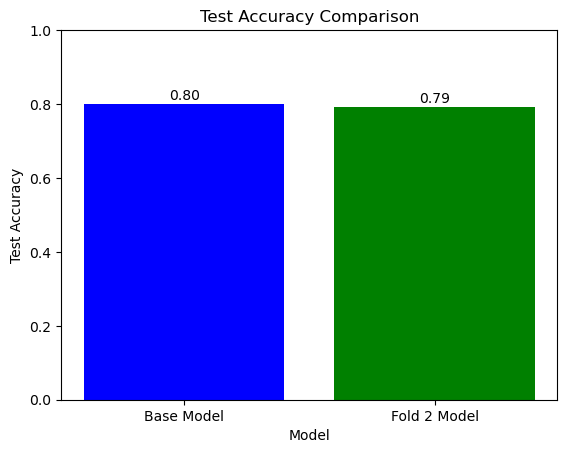

In [411]:
#Comparison based on accuracy

models = ['Base Model', 'Fold 2 Model']
accuracies = [accuracy4, accuracy_kfold]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0,1)

for i,v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

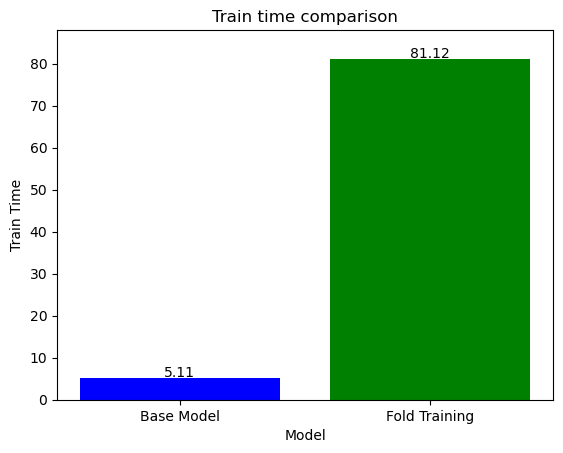

In [418]:
#Comparison based on accuracy

models = ['Base Model', 'Fold Training']
train_time = [train_time_model4, time_taken_kfold]

plt.bar(models,train_time, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Train Time')
plt.title('Train time comparison')
plt.ylim(0,88)

for i,v in enumerate(train_time):
    plt.text(i, v + 0.3, f"{v:.2f}", ha='center')

plt.show()

In [432]:
#Training using learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loss function: Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Optimizer used: Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Initialize the scheduler
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=5, verbose=True)

def train_model_lrs(model, optimizer, train_dataloader, valid_dataloader, criterion, num_epochs=2):
    training_loss_list =[]
    validation_loss_list = []
    training_accuracy_list = []
    validation_accuracy_list = []
    
    for epoch in range(num_epochs):
        # Training phase
        running_training_loss = 0.0
        all_predicted_labels = []
        all_true_labels = []
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            all_predicted_labels.extend(outputs.detach().numpy() > 0.5)
            all_true_labels.extend(labels.numpy())
            
            running_training_loss += loss.item() * inputs.size(0)
        
        training_accuracy = accuracy_score(all_true_labels, all_predicted_labels)
        training_accuracy_list.append(training_accuracy)
        
        epoch_training_loss = running_training_loss / len(train_dataloader.dataset)
        training_loss_list.append(epoch_training_loss)

        # Validation phase
        model.eval()
        running_validation_loss = 0.0
        
        all_predicted_labels = []
        all_true_labels = []
        with torch.no_grad():
            for inputs, labels in valid_dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                all_predicted_labels.extend(outputs.detach().numpy() > 0.5)
                all_true_labels.extend(labels.numpy())
                
                running_validation_loss += loss.item() * inputs.size(0)
                
        validation_accuracy = accuracy_score(all_true_labels, all_predicted_labels)
        validation_accuracy_list.append(validation_accuracy)

        epoch_validation_loss = running_validation_loss / len(valid_dataloader.dataset)
        validation_loss_list.append(epoch_validation_loss)

        # Step the scheduler with validation loss
        scheduler.step(epoch_validation_loss)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {epoch_training_loss}, Validation Loss: {epoch_validation_loss}")
    
    return model, training_loss_list, validation_loss_list, training_accuracy_list, validation_accuracy_list


In [433]:
# Set the model
# Train the neural network. Monitor training loss and the validation loss
model_lrs = Setup4NeuralNet()
optimizer_lrs = optim.SGD(model_lrs.parameters(), lr=0.001, momentum=0.9)
start_time_lrs = time.time()
model_lrs, training_loss_list_lrs, validation_loss_list_lrs, training_accuracy_list_lrs, validation_accuracy_list_lrs = train_model_lrs(model_lrs, optimizer_lrs, train_dataloader, valid_dataloader, criterion1, num_epochs=200)
end_time_lrs = time.time()
train_time_lrs = end_time_lrs - start_time_lrs

Epoch 20/200 - Train Loss: 0.48019264927550925, Validation Loss: 0.556392280433489
Epoch 40/200 - Train Loss: 0.45294458296761586, Validation Loss: 0.5416048340175463
Epoch 00048: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00054: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00060: reducing learning rate of group 0 to 1.0000e-06.
Epoch 60/200 - Train Loss: 0.44405363344434484, Validation Loss: 0.5409996400708738
Epoch 00066: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00072: reducing learning rate of group 0 to 1.0000e-08.
Epoch 80/200 - Train Loss: 0.43750204212629973, Validation Loss: 0.5432555670323579
Epoch 100/200 - Train Loss: 0.432118025288653, Validation Loss: 0.5428940451663473
Epoch 120/200 - Train Loss: 0.4269022888212062, Validation Loss: 0.5426513920659605
Epoch 140/200 - Train Loss: 0.4223076216320493, Validation Loss: 0.5486059935196587
Epoch 160/200 - Train Loss: 0.41647932911986735, Validation Loss: 0.5478832281154135
Epoch 180/200 - Tra

In [434]:
#From trial and error the model trained on fold 2 has the lowest error

accuracy_lrs, _, _, _, _, _, _ = evaluate_metrics(model_lrs, train_dataloader)

print("The accuracy of the model is:",accuracy_lrs)
print("The time taken to train is:",train_time_lrs)

The accuracy of the model is: 0.8022388059701493
The time taken to train is: 5.097004652023315


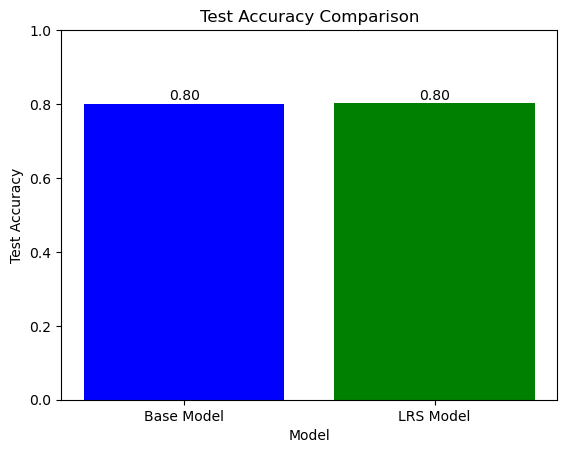

In [436]:
#Comparison based on accuracy

models = ['Base Model', 'LRS Model']
accuracies = [accuracy4, accuracy_lrs]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0,1)

for i,v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

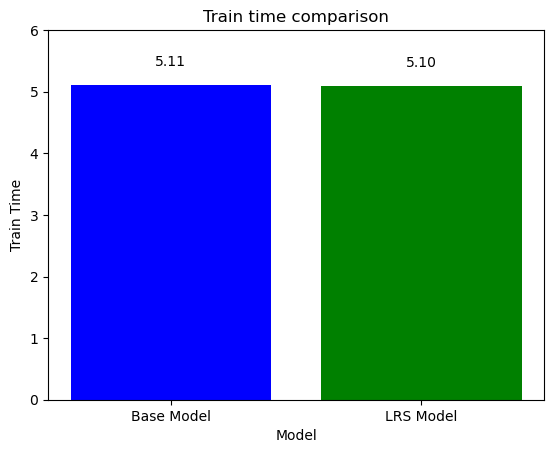

In [438]:
#Comparison based on accuracy

models = ['Base Model', 'LRS Model']
train_time = [train_time_model4, train_time_lrs]

plt.bar(models,train_time, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Train Time')
plt.title('Train time comparison')
plt.ylim(0,6)

for i,v in enumerate(train_time):
    plt.text(i, v + 0.3, f"{v:.2f}", ha='center')

plt.show()

In [ ]:
#Batch Scheduler

In [440]:
#Following is a new model implementing batch scheduler:

import torch.nn as nn
import torch.nn.functional as F
import torch

class Setup4NeuralNetWithBN(nn.Module):
    def __init__(self):
        super(Setup4NeuralNetWithBN, self).__init__()
        
        self.fc1 = nn.Linear(5, 64)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(64, 128)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.2)
        
        self.fc3 = nn.Linear(128, 64)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        self.bn3 = nn.BatchNorm1d(64)
        
        self.fc4 = nn.Linear(64, 1)
        torch.nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        
        x = torch.sigmoid(self.fc4(x))
        return x.squeeze()


In [443]:
#Train the neural network.
model_bn = Setup4NeuralNetWithBN()
optimizer_bn = optim.SGD(model_bn.parameters(), lr=0.001, momentum=0.9)
start_time_bn = time.time()
model_bn, training_loss_list_bn, validation_loss_list_bn, training_accuracy_list_bn, validation_accuracy_list_bn = train_model(model_bn, optimizer_bn, train_dataloader, valid_dataloader, criterion1, num_epochs=200)
end_time_bn = time.time()
train_time_bn = end_time_bn - start_time_bn

Epoch 20/200 - Train Loss: 0.4262738966230136, Validation Loss: 0.5276370457980943
Epoch 40/200 - Train Loss: 0.3994564640877852, Validation Loss: 0.534240966776143
Epoch 60/200 - Train Loss: 0.3800940538075433, Validation Loss: 0.5408771851788396
Epoch 80/200 - Train Loss: 0.3621676777725789, Validation Loss: 0.5574765417886817
Epoch 100/200 - Train Loss: 0.3458370739844308, Validation Loss: 0.5612294648004614
Epoch 120/200 - Train Loss: 0.3293891882718499, Validation Loss: 0.5783792900002521
Epoch 140/200 - Train Loss: 0.31197210367935807, Validation Loss: 0.6021497436191725
Epoch 160/200 - Train Loss: 0.2945555332881301, Validation Loss: 0.6141925443773685
Epoch 180/200 - Train Loss: 0.2774615941652611, Validation Loss: 0.6411958367928214
Epoch 200/200 - Train Loss: 0.2591162577493867, Validation Loss: 0.6689695809198463


In [444]:
#Find the testing accuracy

accuracy_bn, _, _, _, _, _, _ = evaluate_metrics(model_bn, train_dataloader)

print("The accuracy of the model is:",accuracy_bn)
print("The time taken to train is:",train_time_bn)

The accuracy of the model is: 0.8899253731343284
The time taken to train is: 6.437898635864258


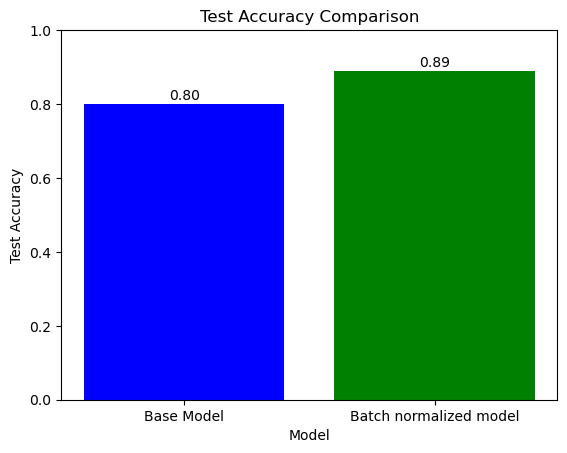

In [445]:
#Comparison based on accuracy

models = ['Base Model', 'Batch normalized model']
accuracies = [accuracy4, accuracy_bn]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0,1)

for i,v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

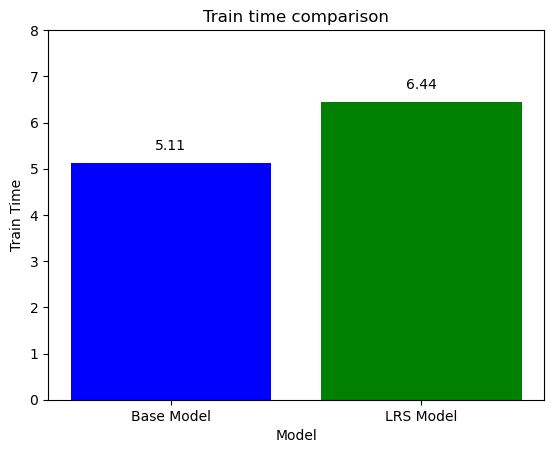

In [447]:
#Comparison based on accuracy

models = ['Base Model', 'LRS Model']
train_time = [train_time_model4, train_time_bn]

plt.bar(models,train_time, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Train Time')
plt.title('Train time comparison')
plt.ylim(0,8)

for i,v in enumerate(train_time):
    plt.text(i, v + 0.3, f"{v:.2f}", ha='center')

plt.show()